In [1]:
%%bash
ls

Projet3.ipynb
#projet.py#
projet.py
__pycache__
regulatory_seq_PHO.fasta
regulatory_seqs_GAL.fasta
regulatory_seqs_MET.fasta
yeast_s_cerevisae_genomic_chr1-4.fna


In [2]:
import projet

In [3]:
projet.read_fasta("regulatory_seq_PHO.fasta")

ERROR:root:
UnicodeDecodeError while processing traceback.



NameError: name 'nucleobase_undetermine' is not defined

In [114]:
import io
import math
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline 

#Définition des nucléotides
nucleotide = {'A':0,'C':1,'G':2,'T':3}
nucleotide_inverse = {0:'A',1:'C',2:'G',3:'T'}
nucleotide_indetermine = {'A':0,'C':1,'G':2,'T':3,'N':-1}

def decode_sequence(sequence):
    inv_nucleotide = {v:k for k, v in nucleotide_indetermine.items()}
    to_str = ""
    for i in sequence:
        if(i in inv_nucleotide):
            to_str += inv_nucleotide[i]
        else:
            to_str += 'N'
    return to_str
    

def encode_sequence(string):
    to_list = []
    for base in string:
        if(base in nucleotide_indetermine):
            to_list.append(nucleotide_indetermine[base])
    return to_list

def read_fasta(fasta_filepath):
    fasta_file = io.open(fasta_filepath, 'r')
    current_sequence = ""
    sequences_dict = {}
    for line in fasta_file.readlines():
        if(line[0] == '>'):
            current_sequence = line
            sequences_dict[line] = []
        else:
            for nucl in line:
                if(nucl in nucleotide_indetermine):
                    sequences_dict[current_sequence].append(nucleotide_indetermine[nucl])
    

    return sequences_dict
    
def nucleotide_count(sequence):
    count = [0 for k in nucleotide]
    for nucl in sequence:
        if(nucl >= 0):
            count[nucl] += 1
    return count

def nucleotide_frequency(sequence):
    count = [0 for k in nucleotide]
    n_nucl = 0.
    for nucl in sequence:
        if(nucl >= 0):
            count[nucl] += 1
            n_nucl += 1.
    return count/(np.sum(count))

def log_proba_sequence(liste_freq):
    proba = 1
    for i in liste_freq:
        proba *= i
    return math.log(proba)

def code(m,k):
    indice = k-1
    res = 0
    for i in m:
        res += nucleotide[i]*(4**indice)
        indice -= 1
    return res

def inverse(indice ,k):
    res = ""
    reste = 0
    index = k-1
    temoin = indice 
    for i in range(k):
        res += nucleotide_inverse[temoin//(4**(index))]
        temoin = temoin%4**(index)
        index -= 1
    return res
    
def genereMots(k):
    res = {}
    for i in range(4**k):
        res[inverse(i, k)] = 0
    return res
    
def count_word(k, sequence):
    res = {}
    
    for i in range(len(sequence)-k+1):
        mot = sequence[i:i+k]
        string = ""
        for s in mot:
            string += nucleotide_inverse[s]
        if string in res.keys():
            res[string] += 1
        else:
            res[string] = 1
            
    return res
    
def comptage_attendu(frequences, k, l):
    #UTILISER LOGPROBA
    result = {}
    mots = genereMots(k)
    for mot in mots:
        inter = 1
        for lettre in mot:
            inter *= frequences[nucleotide[lettre]]
        result[mot] = inter*l
    return result

def graphique(k, sequence):
    frequences = nucleotide_frequency(sequence)
    abscisse = comptage_attendu(frequences, k, len(sequence))
    ordonnee = count_word(k, sequence)
    x = []
    y = []
    for cle in ordonnee.keys():
        y.append(ordonnee[cle])
        x.append(abscisse[cle])
    plt.scatter(x, y, edgecolor='black')
    plt.show()
    
def simule_sequence(lg, m):
    seq =[]
    for i in range(lg):
        a = random.random()
        if a < m[0]:
            seq.append(0)
        elif a < m[0]+m[1]:
            seq.append(1)
        elif a < m[0]+m[1]+m[2]:
            seq.append(2)
        else:
            seq.append(3)
    return seq
    
def compare(k, sequence):
    frequences = nucleotide_frequency(sequence)
    abscisse = comptage_attendu(frequences, k, len(sequence))
    ordonnee = count_word(k, sequence)
    x = []
    y = []
    for cle in ordonnee.keys():
        y.append(ordonnee[cle])
        x.append(abscisse[cle])
    return math.fabs(np.mean([y])-np.mean([x]))

def probaempirique(sequences,mot,n):
    res = 0
    
    for i in sequences.values():
        dico = count_word(len(mot), i)
        if mot in dico.keys() and dico[mot] >= n:
            res += 1
    return res*1.0/len(sequences)

In [119]:
sequence = read_fasta("regulatory_seq_PHO.fasta")
nom = list(sequence.keys())
print(code('TAC',3))
49//(4**2)
print(inverse(49,3))
genereMots(1)
nucleotide_frequency(simule_sequence(100000,[0.25,0.25,0.25,0.25]))
probaempirique(sequence, 'ATATAT',1)

49
TAC


0.6

In [73]:
complet = []
for k in nom:
    complet = complet + sequence[k]
    print(k, nucleotide_count(sequence[k]))
    print(nucleotide_frequency(sequence[k]))
    print(log_proba_sequence(nucleotide_frequency(sequence[k])))
    print("\n\n")
sequence["complet"] = complet
sequenceLength = nucleotide_count(sequence["complet"])
letterFrequency = nucleotide_frequency(sequence["complet"])
sequenceLog = log_proba_sequence(nucleotide_frequency(sequence["complet"]))

>PHO11	PHO11; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001133.7:224651:225450:D
 [289, 145, 139, 227]
[0.36125 0.18125 0.17375 0.28375]
-5.735862529526608



>PHO84	PHO84; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001145.2:25802:26601:R
 [269, 182, 136, 213]
[0.33625 0.2275  0.17    0.26625]
-5.665781792547597



>PHO8	PHO8; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001136.8:1420243:1421042:R
 [267, 162, 198, 173]
[0.33375 0.2025  0.2475  0.21625]
-5.6220432918467615



>PHO5	PHO5; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001134.7:430946:431745:R
 [255, 160, 158, 227]
[0.31875 0.2     0.1975  0.28375]
-5.634464499771086



>PHO81	PHO81; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001139.8:958214:959013:R
 [251, 145, 145, 259]
[0.31375 

In [74]:
count_word(4, sequence[nom[0]])

{'AAAA': 31,
 'AAAC': 7,
 'AAAG': 11,
 'AAAT': 8,
 'AACA': 9,
 'AACC': 3,
 'AACG': 3,
 'AAGA': 12,
 'AAGC': 5,
 'AAGG': 5,
 'AAGT': 6,
 'AATA': 6,
 'AATC': 2,
 'AATG': 3,
 'AATT': 5,
 'ACAA': 6,
 'ACAC': 3,
 'ACAG': 5,
 'ACAT': 8,
 'ACCA': 5,
 'ACCC': 2,
 'ACCG': 1,
 'ACCT': 2,
 'ACGA': 2,
 'ACGC': 1,
 'ACGT': 5,
 'ACTA': 2,
 'ACTG': 1,
 'ACTT': 3,
 'AGAA': 12,
 'AGAC': 1,
 'AGAG': 6,
 'AGAT': 7,
 'AGCA': 3,
 'AGCC': 2,
 'AGCG': 2,
 'AGCT': 4,
 'AGGA': 5,
 'AGGC': 1,
 'AGGG': 1,
 'AGGT': 2,
 'AGTA': 4,
 'AGTC': 1,
 'AGTG': 1,
 'AGTT': 5,
 'ATAA': 7,
 'ATAC': 5,
 'ATAG': 5,
 'ATAT': 7,
 'ATCA': 5,
 'ATCC': 1,
 'ATCG': 2,
 'ATCT': 5,
 'ATGA': 6,
 'ATGC': 1,
 'ATGT': 3,
 'ATTA': 6,
 'ATTC': 5,
 'ATTG': 4,
 'ATTT': 7,
 'CAAA': 6,
 'CAAC': 2,
 'CAAG': 6,
 'CAAT': 2,
 'CACA': 7,
 'CACC': 1,
 'CACG': 4,
 'CACT': 1,
 'CAGA': 6,
 'CAGC': 3,
 'CAGG': 1,
 'CAGT': 1,
 'CATA': 5,
 'CATC': 7,
 'CATG': 2,
 'CATT': 6,
 'CCAA': 2,
 'CCAC': 3,
 'CCAG': 2,
 'CCAT': 3,
 'CCCG': 1,
 'CCCT': 2,
 'CCGA': 2,


In [75]:
comptage_attendu([0.25,0.25,0.49,0.01], 2, 100)

{'AA': 6.25,
 'AC': 6.25,
 'AG': 12.25,
 'AT': 0.25,
 'CA': 6.25,
 'CC': 6.25,
 'CG': 12.25,
 'CT': 0.25,
 'GA': 12.25,
 'GC': 12.25,
 'GG': 24.009999999999998,
 'GT': 0.49,
 'TA': 0.25,
 'TC': 0.25,
 'TG': 0.49,
 'TT': 0.01}

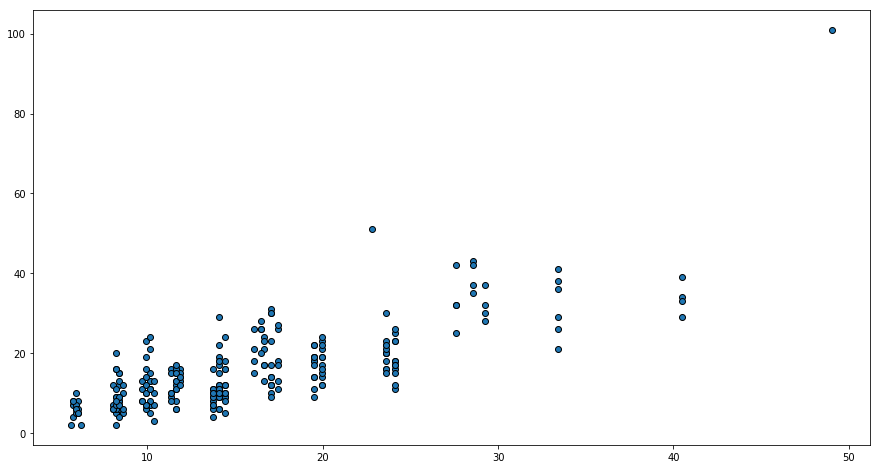

In [79]:
graphique(4, sequence["complet"])
#On testera avec k = 2, 4, 6, 8.

In [103]:
mean = []
for i in range(1000):
    mean.append(compare(4, simule_sequence(100, [0.3, 0.01, 0.345, 0.345])))
np.mean([mean])

0.47449571646423466